In [1]:
using BenchmarkTools
using Plotly
using Random
using StatsBase

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-14006538521495325209\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-11726569184180168729\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-14006538521495325209\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

In [2]:
Random.seed!(20121020)

;

In [3]:
element_ = string.(Array('A':'Z'))

n_element = length(element_)

element_score_ = randn(n_element)

;

In [4]:
n_set_element = 3

set_element_ = sample(element_, n_set_element; replace=false)

;

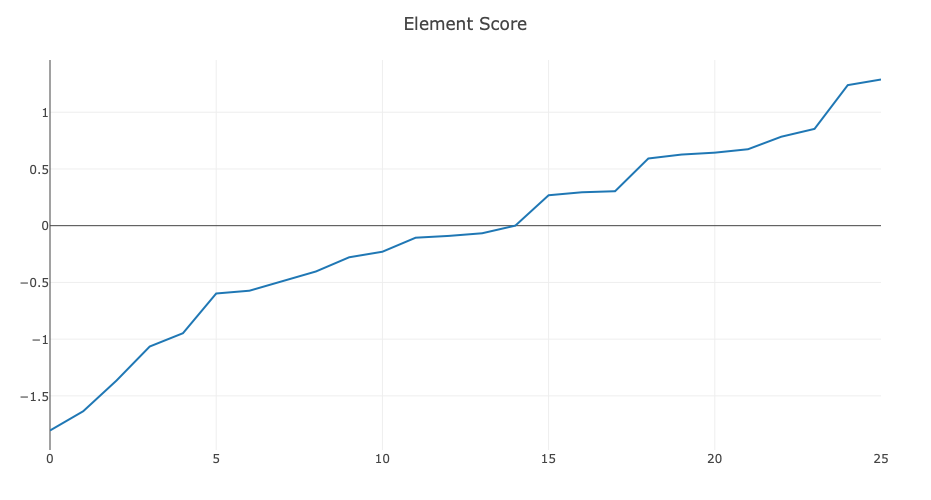

In [5]:
index_ = sortperm(element_score_)

element_score_ = element_score_[index_]

# element_ = element_[index_]

plot([scatter(y=element_score_)], Layout(title="Element Score"))

In [6]:
set_element_to_nothing = Dict(set_element => nothing for set_element in set_element_)

h_1 = [Float64(haskey(set_element_to_nothing, element)) for element in element_]

m_1 = 1 .- h_1

;

In [7]:
function cumsum_reverse(a::Vector)
    
    return reverse(cumsum(Iterators.reverse(a)))
    
end

cumsum_reverse (generic function with 1 method)

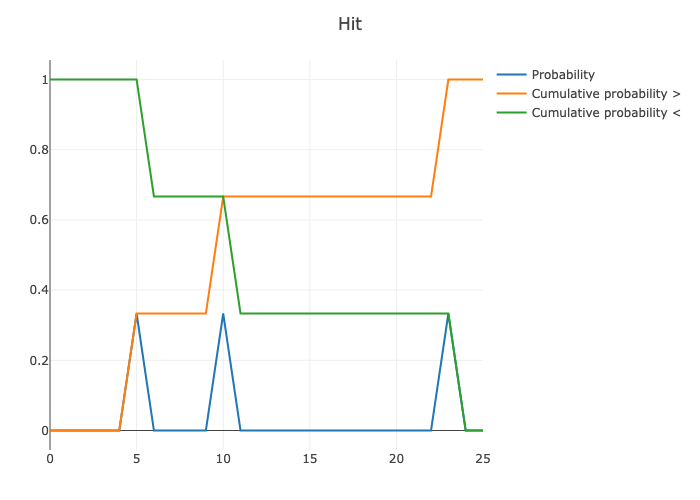

In [9]:
h_1_p = h_1 / sum(h_1)

h_1_p_rc = cumsum(h_1_p)

h_1_p_lc = cumsum_reverse(h_1_p)

plot(
    [
        scatter(name="Probability", y=h_1_p),
        scatter(name="Cumulative probability >", y=h_1_p_rc),
        scatter(name="Cumulative probability <", y=h_1_p_lc),
    ],
    Layout(title="Hit"),
)

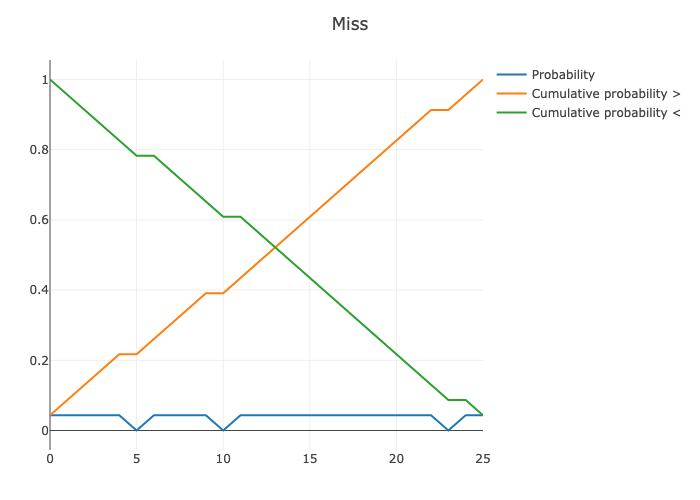

In [10]:
m_1_p = m_1 / sum(m_1)

m_1_p_rc = cumsum(m_1_p)

m_1_p_lc = cumsum_reverse(m_1_p)

plot(
    [
        scatter(name="Probability", y=m_1_p),
        scatter(name="Cumulative probability >", y=m_1_p_rc),
        scatter(name="Cumulative probability <", y=m_1_p_lc),
    ],
    Layout(title="Miss"),
)

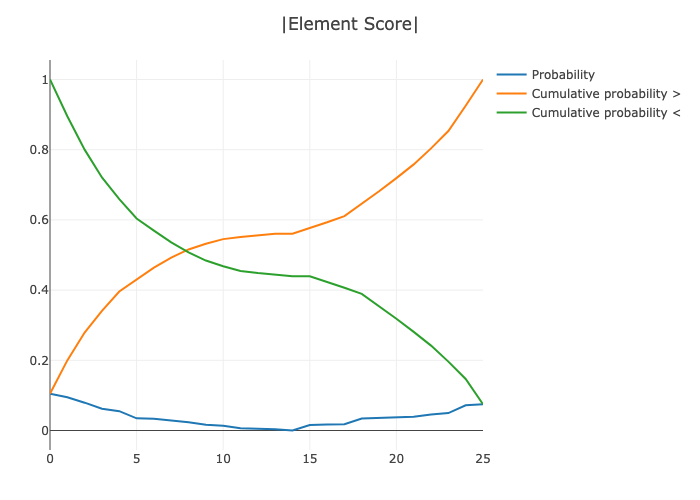

In [11]:
a = abs.(element_score_)

a_p = a / sum(a)

a_p_rc = cumsum(a_p)

a_p_lc = cumsum_reverse(a_p)

plot(
    [
        scatter(name="Probability", y=a_p),
        scatter(name="Cumulative probability >", y=a_p_rc),
        scatter(name="Cumulative probability <", y=a_p_lc),
    ],
    Layout(title="|Element Score|"),
)

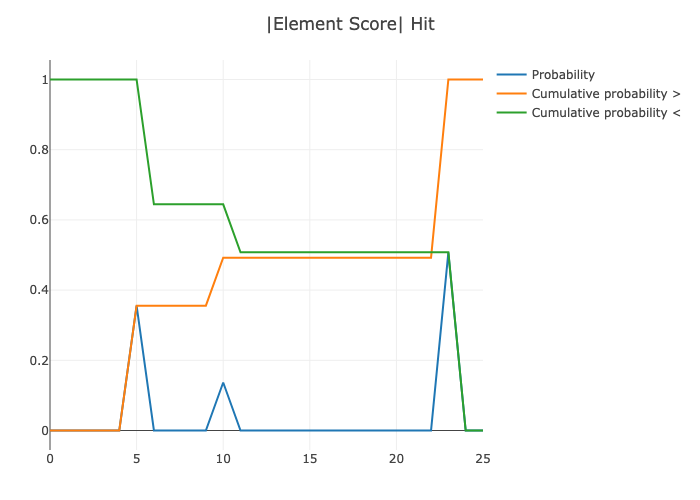

In [12]:
h_a = h_1 .* a

h_a_p = h_a / sum(h_a)

h_a_p_rc = cumsum(h_a_p)

h_a_p_lc = cumsum_reverse(h_a_p)

plot(
    [
        scatter(name="Probability", y=h_a_p),
        scatter(name="Cumulative probability >", y=h_a_p_rc),
        scatter(name="Cumulative probability <", y=h_a_p_lc),
    ],
    Layout(title="|Element Score| Hit"),
)

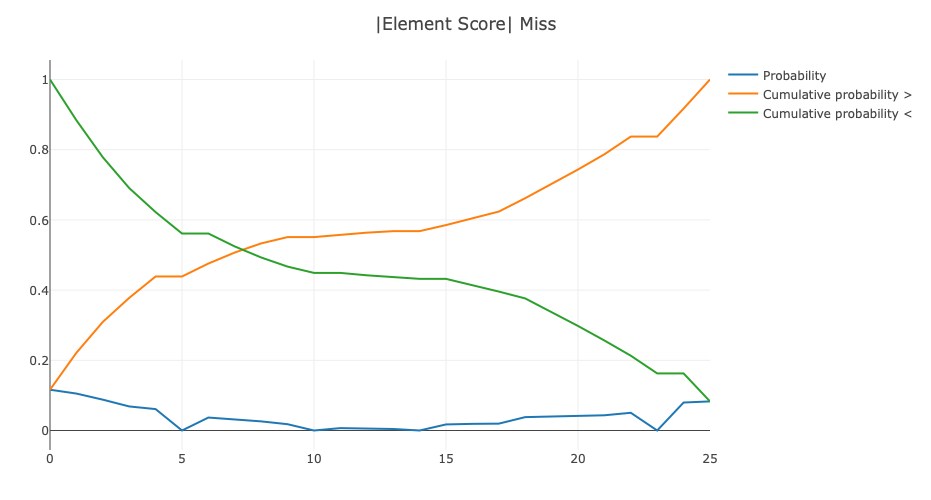

In [14]:
m_a = m_1 .* a

m_a_p = m_a / sum(m_a)

m_a_p_rc = cumsum(m_a_p)

m_a_p_lc = cumsum_reverse(m_a_p)

plot(
    [
        scatter(name="Probability", y=m_a_p),
        scatter(name="Cumulative probability >", y=m_a_p_rc),
        scatter(name="Cumulative probability <", y=m_a_p_lc),
    ],
    Layout(title="|Element Score| Miss"),
)

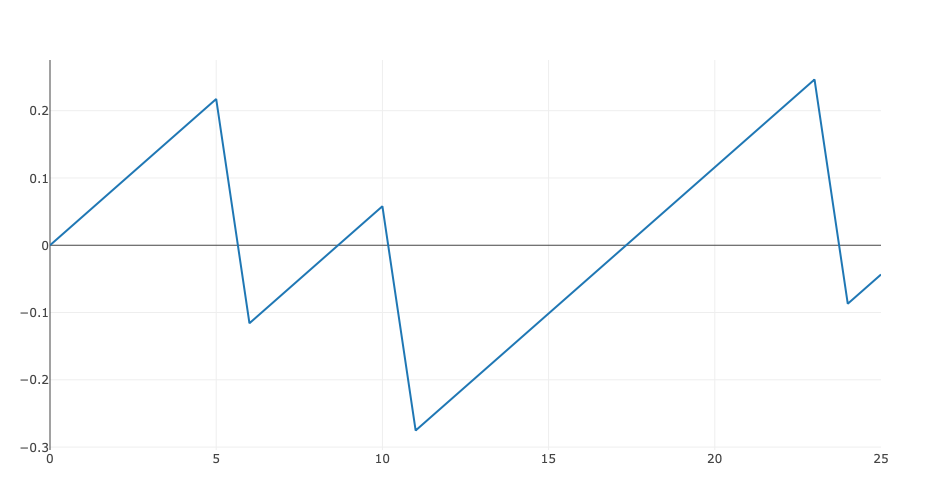

In [15]:
# KS

s = h_1_p_lc - m_1_p_lc

plot(
    [
        scatter(y=s)
]
)

In [16]:
# # JSD

# s = JSD(h_a_p_rc, m_a_p_rc, a_p_rc) - JSD(h_a_p_lc, m_a_p_lc, a_p_lc)

In [17]:
score = sum(s) / length(s)

0.007246376811594343